In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Load the simulation
from pythonmd.simcore import MDSimulationSession

In [3]:
%%file ideal_gas
[MD Simulation]
number_of_molecules:1000
box_width: 300
box_height: 300

Overwriting ideal_gas


In [4]:
#Use ideal gas set-up
session = MDSimulationSession('ideal_gas')
#heat up the gas until T=4
session.run_until_t(4)
#Wait some time (not until equilibrium)
session.run(100)
#Cool the gas until T=1.2
session.run_until_t(1.2)
#Wait until gas equilibrium
session.run_until_equilibrium(delta_t=1e-05)
current_time, average_T, average_P, tota_energy, kinetic, potential, volume, number_of_molecules = session.get_stats()
print("PV / NT = %.4f" % ((average_P*volume)/(number_of_molecules*average_T)))
print("T = %.4f" % average_T)

PV / NT = 0.9960
T = 1.0019


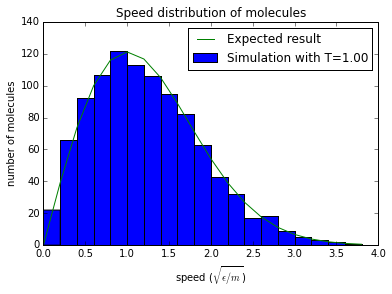

In [5]:
from matplotlib import pyplot as plt
speeds = session.get_molecules_speed()
bins = numpy.arange(0,4,.2)
n, bins, patches = plt.hist(speeds, bins=bins, label="Simulation with T=%.2f"%average_T)
plt.xlabel("speed ($\sqrt{\epsilon/m}$)")
plt.ylabel("number of molecules")
plt.title("Speed distribution of molecules")
expected = (1/average_T)*bins*exp(-(bins**2/(2*average_T)))*number_of_molecules*.2
plt.plot(bins, expected, label="Expected result")
plt.legend(loc='upper right')

In [6]:
print("kinetic vs potential: %.4f, %.4f" % (kinetic, potential))

kinetic vs potential: 996.6443, -29.3540


In [7]:
print("Theoretical most probable speed: %.4f" % sqrt(average_T))
print("Average speed: %.4f" % (sum(speeds)/number_of_molecules))
print("Theoretical average speed: %.4f" % sqrt(average_T*math.pi/2))
print("Average quadratic speed: %.4f" % (sum([i**2 for i in speeds])/number_of_molecules))
print("Theoretical average quadratic speed: %.4f" % (2*average_T))

Theoretical most probable speed: 1.0009
Average speed: 1.2434
Theoretical average speed: 1.2545
Average quadratic speed: 1.9933
Theoretical average quadratic speed: 2.0038


In [8]:
%%file ideal_gas
[MD Simulation]
number_of_molecules:100
box_width: 100
box_height: 100

Overwriting ideal_gas


In [9]:
temperature = []
energy = []
pressure = []

session = MDSimulationSession('ideal_gas')
session.run_until_t(1.5)
session.run_until_equilibrium(delta_t=1e-05)
    
current_time, average_T, average_P, total_energy, kinetic, potential, volume, number_of_molecules = session.get_stats()
temperature.append(average_T)
energy.append(total_energy/number_of_molecules)
pressure.append(average_P)

for t in linspace(1.5,.1,14):
    session.run_until_t(t)
    session.run_until_equilibrium(delta_t=1e-05)
    current_time, average_T, average_P, total_energy, kinetic, potential, volume, number_of_molecules = session.get_stats()
    temperature.append(average_T)
    energy.append(total_energy/number_of_molecules)
    pressure.append(average_P)

print("Done!")

Done!


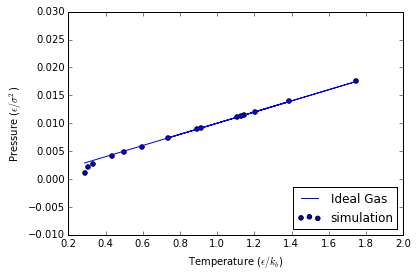

In [10]:
plt.scatter(temperature, pressure, label='simulation')
plt.plot(temperature, np.array(temperature)*number_of_molecules/volume, label='Ideal Gas')
plt.xlabel("Temperature ($\epsilon/k_b$)")
plt.ylabel("Pressure ($\epsilon/ \sigma^2 $)")
plt.legend(loc='lower right')

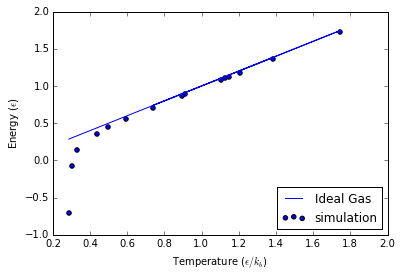

In [11]:
plt.scatter(temperature, energy, label='simulation')
plt.plot(temperature, temperature, label='Ideal Gas')
plt.xlabel("Temperature ($\epsilon/k_b$)")
plt.ylabel("Energy ($\epsilon$)")
plt.legend(loc='lower right')